In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
# Upload File
from google.colab import files
uploaded = files.upload()  # Select your Airbnb dataset file

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx


In [3]:
# Load Dataset
file_name = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[file_name]))  # For Excel
# If CSV: df = pd.read_csv(io.BytesIO(uploaded[file_name]))

In [4]:
# Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns after standardization:\n", df.columns)

Columns after standardization:
 Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')


In [5]:
#  Quick Overview
print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Dataset Shape: (102599, 26)
        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service_fee  minimum_nights  \
0  

In [6]:

# Clean Numeric Columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
# Convert all non-numeric entries in numeric-looking columns to NaN, then fill with median
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Fill Categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


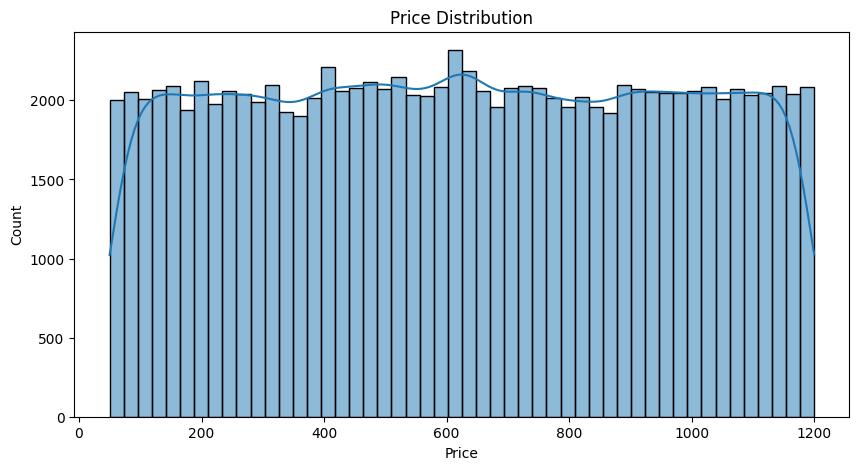

In [7]:
# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [8]:
# Price vs Bedrooms
bed_col = 'bedrooms' if 'bedrooms' in df.columns else 'beds'
if bed_col in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=bed_col, y='price', data=df)
    plt.title("Price vs Number of Bedrooms")
    plt.show()


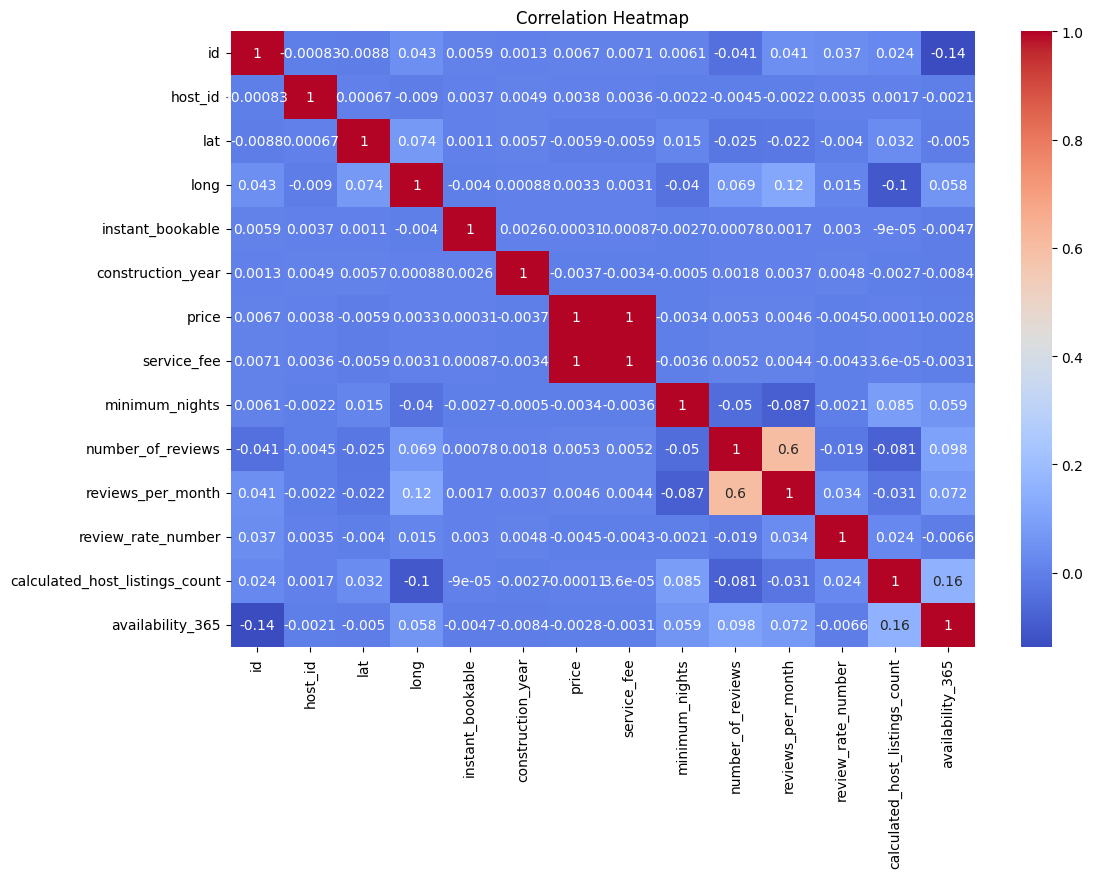

In [9]:
# Correlation Heatmap (Numeric Only)
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

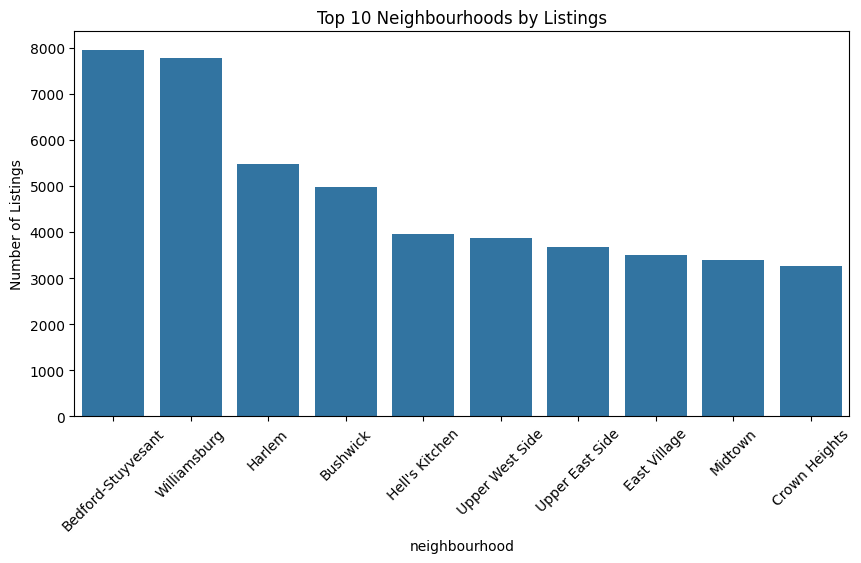

In [10]:
if 'neighbourhood' in df.columns:
    top_neighborhoods = df['neighbourhood'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Neighbourhoods by Listings")
    plt.ylabel("Number of Listings")
    plt.show()

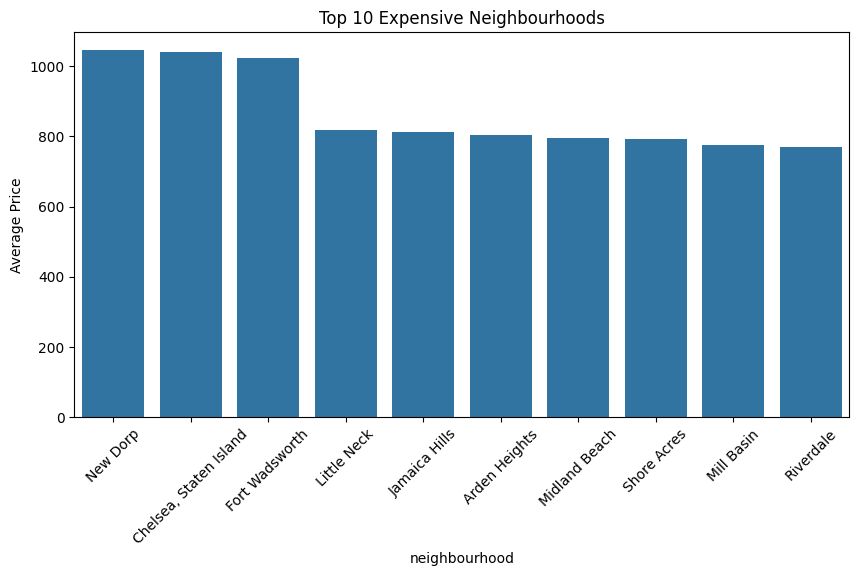

In [11]:
 # Average Price per Neighbourhood
 if 'neighbourhood' in df.columns:
    avg_price_neighborhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=avg_price_neighborhood.index, y=avg_price_neighborhood.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Expensive Neighbourhoods")
    plt.ylabel("Average Price")
    plt.show()

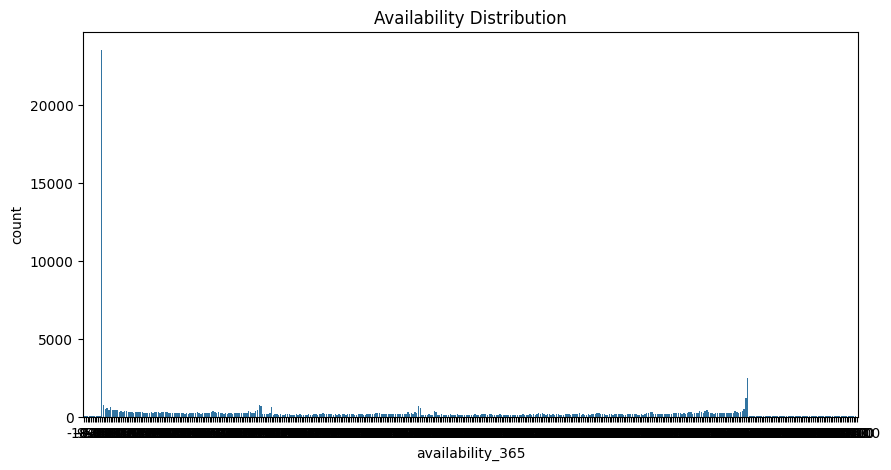

In [12]:
# Availability Distribution
if 'availability_365' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x='availability_365', data=df)
    plt.title("Availability Distribution")
    plt.show()

In [13]:
# Basic Insights
print("Average Price:", df['price'].mean())
if 'room_type' in df.columns:
    print("Most common property type:", df['room_type'].mode()[0])
if 'neighbourhood' in df.columns:
    print("Neighbourhood with highest listings:", df['neighbourhood'].value_counts().idxmax())

Average Price: 625.290421933937
Most common property type: Entire home/apt
Neighbourhood with highest listings: Bedford-Stuyvesant


In [14]:
# Save Cleaned Dataset
df.to_csv("Cleaned_Airbnb_NYC.csv", index=False)